# Network Algorithms Project

## Import

In [29]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as mcolors

## Data

### Reading Data

In [30]:
print('\n\tThe Dataframe:\n\t(printing only 5 rows)\n')
data = pd.read_csv('datas.csv')
print(data.head()) # to see first rows of the dataframe (will return 5 rows by default)
print(data.columns) # to see all column titles of the dataframe
G = nx.from_pandas_edgelist(data, source='a_node_id',target='b_node_id',edge_attr=True, create_using=nx.DiGraph)


	The Dataframe:
	(printing only 5 rows)

    a_node_id   b_node_id  distance
0  1416166971  4452302338  0.000098
1  4452302338  4452302339  0.000125
2  4452302339  1416166975  0.000212
3  1416166975  2290884751  0.000067
4  2290884751   276371234  0.000094
Index(['a_node_id', 'b_node_id', 'distance'], dtype='object')


In [31]:
#degree = in_degree + out_degree
print('Degree of 1416166971',G.degree(1416166971))

Degree of 1416166971 3


### Plotting the graph

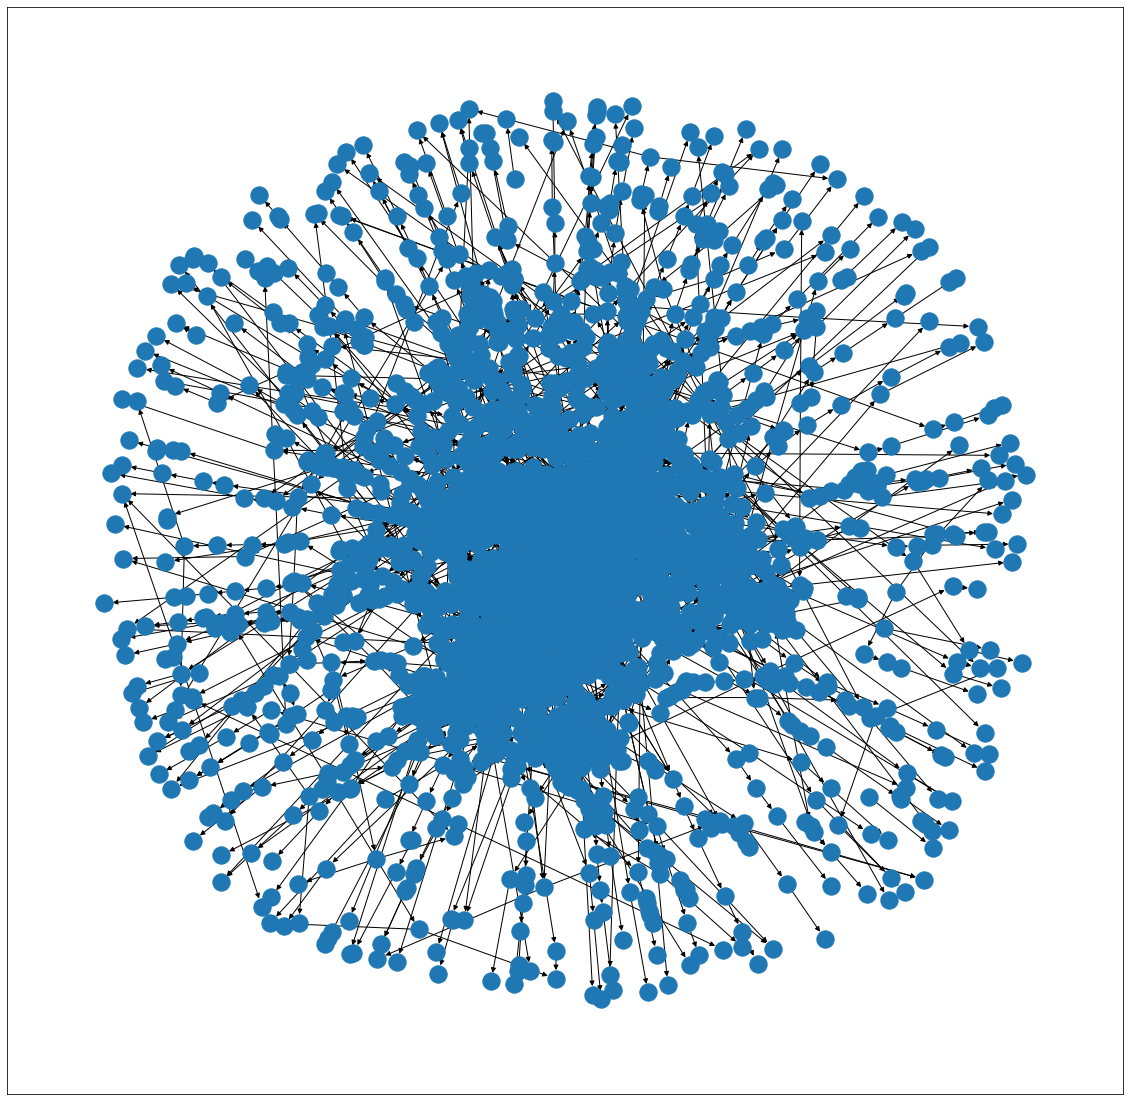

In [32]:
# Plot the graph
plt.figure(figsize=(20, 20))
nx.draw_networkx(G, with_labels=False)
plt.savefig('plot.png')
plt.show()

### Shortest Path

In [33]:
# Shortest path with weight 'distance'
print("\nThe shortest path from 2290884752 to 276846064 :\n", nx.shortest_path(G, source=2290884752, target=276846064, weight="distance"))
print("The length of the shortest path: ", nx.dijkstra_path_length(G, source=2290884752, target=276846064, weight="distance"))


The shortest path from 2290884752 to 276846064 :
 [2290884752, 4452302340, 276370538, 276370539, 4475530721, 276371827, 276848321, 3301800602, 276370540, 3301800603, 4462419104, 3301800483, 4462419100, 4462419101, 4462419102, 7397174181, 5910488077, 7397174168, 4445150324, 4495237315, 4489370559, 4489370560, 4489370556, 4489370557, 4489370558, 4629196998, 2558452956, 276846064]
The length of the shortest path:  0.01404


# Metrics

### Draw the graph with metrics

In [34]:
# Plot the graph according to the given measurement
def draw(G, pos, measures, measure_name):
    plt.figure(figsize=(20, 15))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.savefig(measure_name+'.png')
    plt.show()

## Centrality Measurements

### Betweenness Centrality

In [35]:
#Betweeness Centrality - Nb times node is present in shortest path between 2 other nodes
def betweenness_centrality(graph, node):
    result = 0
    paths = nx.shortest_path(graph)

    for node1 in nx.nodes(graph):
        if node1 == node: continue
        for node2 in nx.nodes(graph):
            if node2 == node or node2 == node1: continue
            if node in paths[node1][node2]:
                result += 1
 
    return result

In [36]:
# Calculating centralities and drawing the graph according to them
bc = nx.betweenness_centrality(G)
print(bc)
bc_imp = max(bc, key=bc.get)
print("\nThe node with highest betweenness centrality is the node with id",bc_imp)


{1416166971: 0.004727582732697823, 4452302338: 0.0038278046915001343, 4452302339: 0.0038777358931650157, 1416166975: 0.0039276670948298975, 2290884751: 0.003977598296494779, 276371234: 0.00402752949815966, 2290884752: 0.004077460699824542, 4452302340: 0.004127391901489424, 276370538: 0.0041773231031543056, 276372005: 0.016513602939962343, 276372004: 0.03063196462738375, 3880329850: 0.007904566608604177, 276372003: 0.05045467245094858, 276371600: 0.04247917098112058, 276848308: 0.007592973040962643, 3131788533: 0.004288620132819537, 3131788531: 0.0037692339943817873, 4608687409: 0.0032492125989253993, 4475530720: 0.003293045333211364, 276371601: 0.05972794281250962, 2290884761: 0.011653705305963073, 276375037: 0.006985963784420872, 276876493: 0.0, 276375038: 0.014103616348805232, 276873614: 0.014153547550470115, 276873619: 0.007967774681958573, 276842653: 0.006312038671059264, 2558460940: 0.0052424945442009745, 2558449297: 0.007490097401841144, 276843166: 0.020227843399827805, 391596015

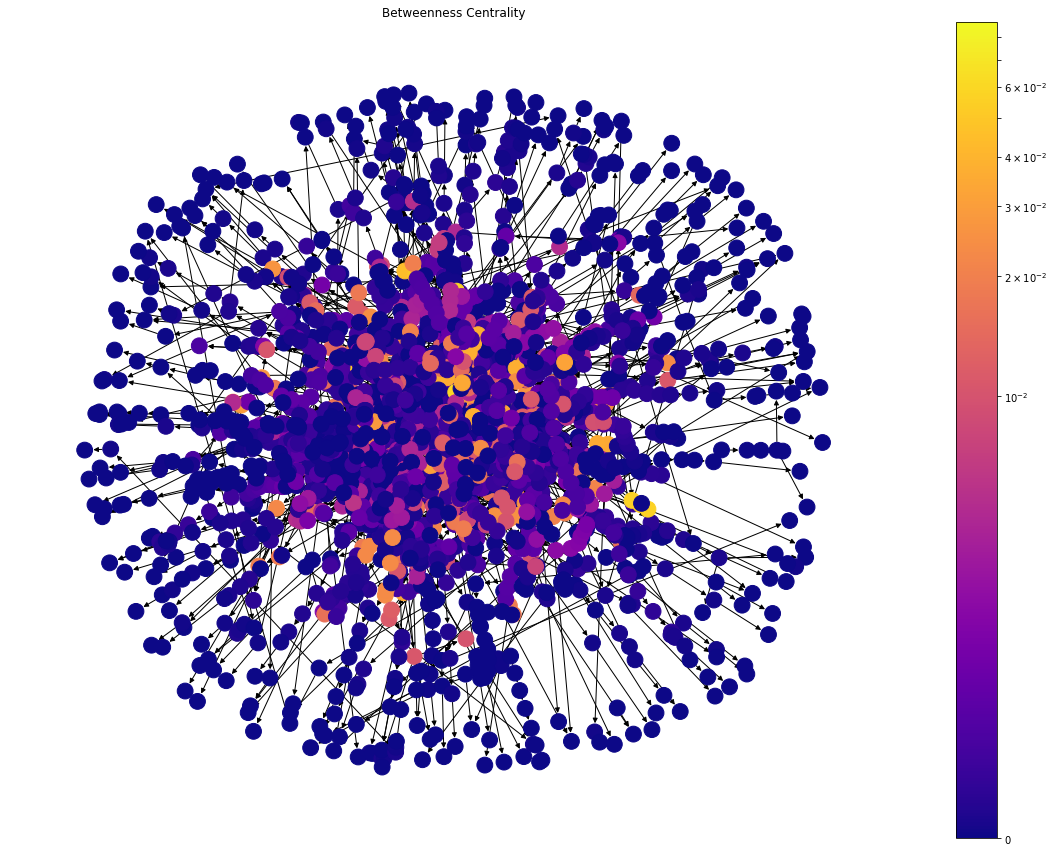

In [37]:
pos = nx.spring_layout(G, seed=675)
draw(G, pos, nx.betweenness_centrality(G), "Betweenness Centrality")

### Closeness Centrality

In [38]:
#Closeness Centrality - the average length of the shortest path from the node to all other nodes
def closeness_centrality(graph, node, weight="distance"):
    result = 0
    paths = nx.shortest_path(graph, source=node)

    for node2 in nx.nodes(graph):
        if node != node2:
            result += sum([graph.edges[paths[node2][i], paths[node2][i + 1]][weight] for i in range(len(paths[node2]) - 1)])
            
    return result / (len(nx.nodes(graph)) - 1)

In [41]:
cc = nx.closeness_centrality(G)
cc_imp = max(cc, key=cc.get)
print("\nThe node with the highest closeness centrality is the node with id",cc_imp)


The node with the highest closeness centrality is the node with id 277361074


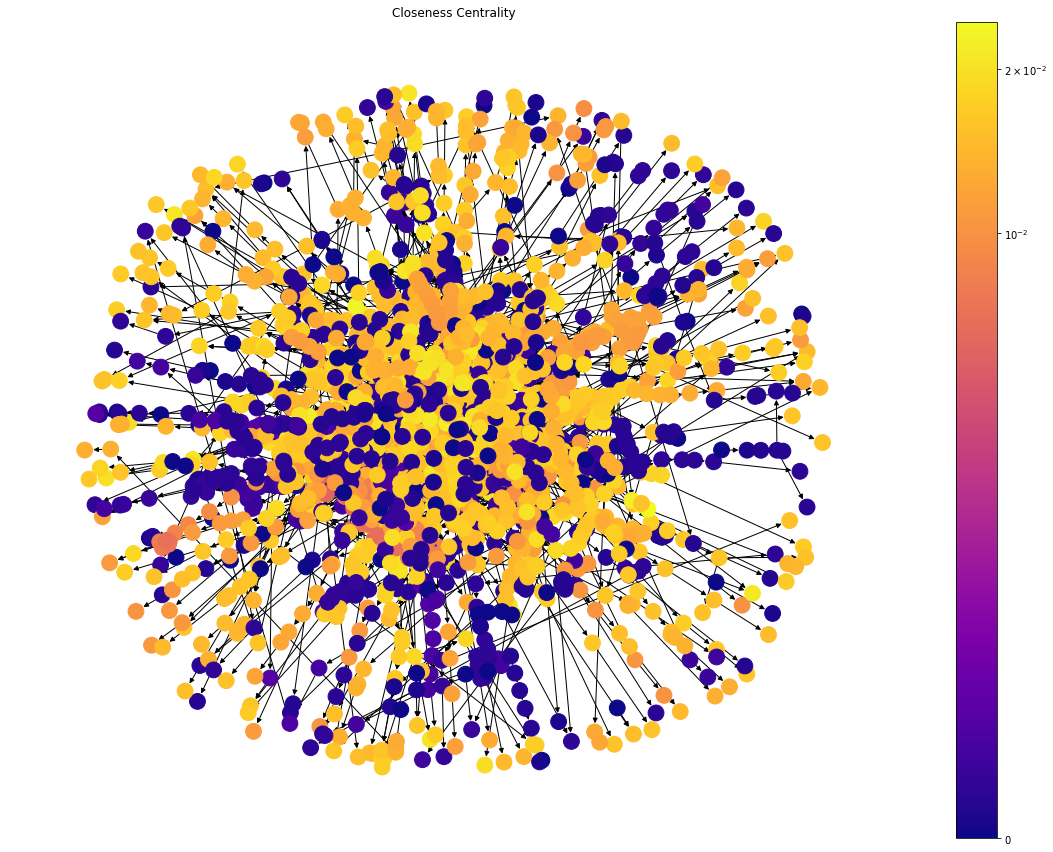

In [42]:
pos = nx.spring_layout(G, seed=675)
draw(G, pos, nx.closeness_centrality(G), "Closeness Centrality")

### Degree Centrality

In [43]:
dc = nx.degree_centrality(G)
dc_imp = max(dc, key=dc.get)
print("\nThe node witht he highest degree centrality is the node with id",dc_imp)


The node witht he highest degree centrality is the node with id 276876535


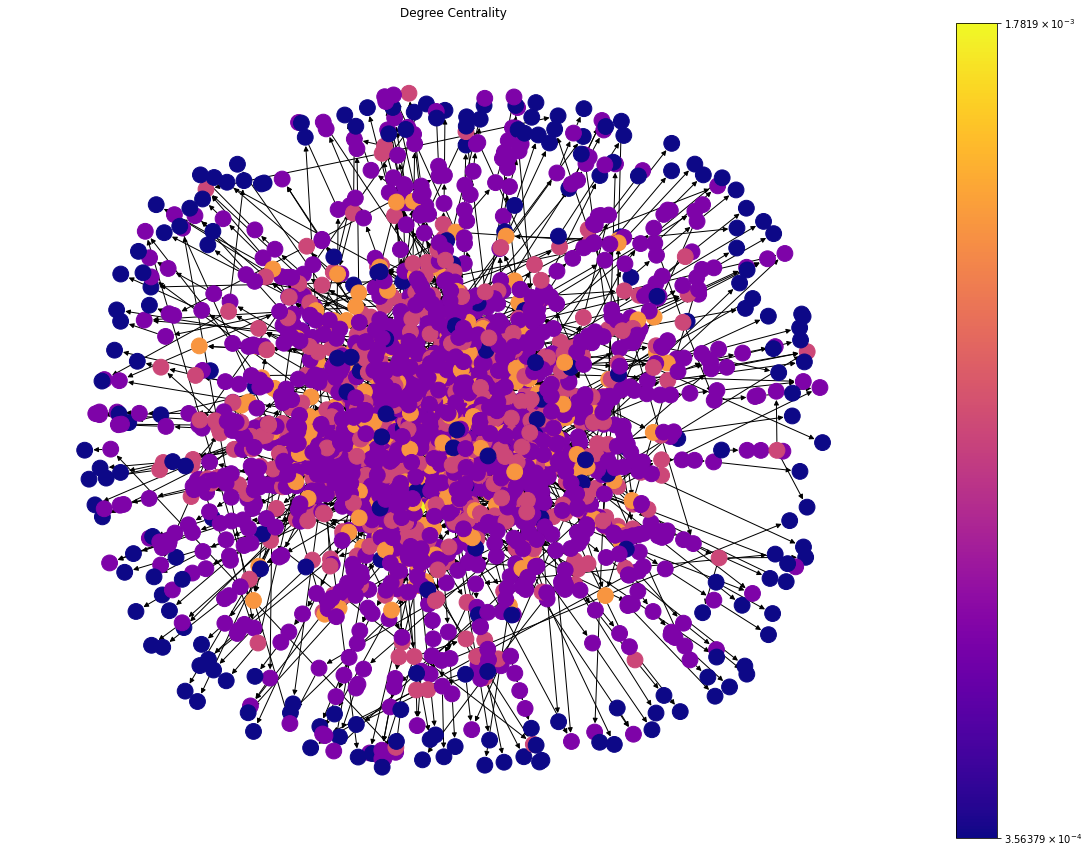

In [44]:
pos = nx.spring_layout(G, seed=675)
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

## Other Measurements

### Connectivity Degree

In [45]:
#Connectivity Degree - the number of edges connected to a node
def connectivity_degree (graph, node):
    return len(nx.edges(graph, node)), len([e for e in nx.edges(graph) if e[1] == node])

In [46]:
print(connectivity_degree(G,1416166971))

(2, 1)


### Network Density

In [47]:
#Network Density
def network_density(graph):
    if graph.is_directed():
        return len(graph.edges) / (len(graph.nodes) * (len(graph.nodes) - 1))
    else:
        return 2 * len(graph.edges) / (len(graph.nodes) * (len(graph.nodes) - 1))

In [48]:
pos = nx.spring_layout(G, seed=675)
nd = nx.density(G)
print("The network density: ", nd)

The network density:  0.0004314130669660235


### Network Diameter

There is an inifinite path in the digraph because it is not strongly connected. Meaning there are certain nodes that have no path to another node. Hence, network diameter cannot be calculated.